In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('Mercedez.csv')

In [3]:
data.shape 

(6983, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-12-02,42.739178,43.462132,42.654171,43.249538,12.772128,1104301
1,1996-12-03,43.844894,44.844238,43.802399,44.780453,13.224225,2090177
2,1996-12-04,44.397755,44.546562,43.908695,44.312675,13.086085,1395255
3,1996-12-05,44.270164,44.716648,43.079445,43.611015,12.878877,2248879
4,1996-12-06,42.547874,42.951847,41.676037,42.611588,12.583734,3265414


In [5]:
data.index 

RangeIndex(start=0, stop=6983, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

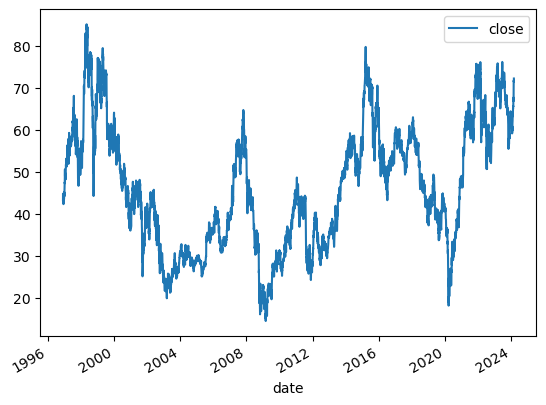

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('Mercedez.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,6983.000000,6983.000000,6983.000000,6983.000000,6.983000e+03
mean,46.135304,46.703177,45.523439,46.111304,5.696097e+06
std,14.728105,14.841190,14.614279,14.713846,4.150385e+06
min,14.688660,15.108692,14.306056,14.505675,0.000000e+00
25%,33.731518,34.292948,33.257421,33.798058,3.153640e+06
50%,44.914364,45.413410,44.365410,44.914364,4.846313e+06
75%,57.282066,57.913128,56.560326,57.261654,7.074820e+06
max,85.521103,92.282379,84.542969,85.052834,7.396760e+07


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data.head() 

,open,high,low,close,volume,Tomorrow
date,,,,,,
1996-12-02,42.739178,43.462132,42.654171,43.249538,1104301,44.780453
1996-12-03,43.844894,44.844238,43.802399,44.780453,2090177,44.312675
1996-12-04,44.397755,44.546562,43.908695,44.312675,1395255,43.611015
1996-12-05,44.270164,44.716648,43.079445,43.611015,2248879,42.611588
1996-12-06,42.547874,42.951847,41.676037,42.611588,3265414,43.504707


In [13]:
data['previousday']=data['close'].shift(1)

In [14]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
1996-12-02,42.739178,43.462132,42.654171,43.249538,1104301,44.780453,NaN
1996-12-03,43.844894,44.844238,43.802399,44.780453,2090177,44.312675,43.249538
1996-12-04,44.397755,44.546562,43.908695,44.312675,1395255,43.611015,44.780453
1996-12-05,44.270164,44.716648,43.079445,43.611015,2248879,42.611588,44.312675
1996-12-06,42.547874,42.951847,41.676037,42.611588,3265414,43.504707,43.611015


In [15]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]

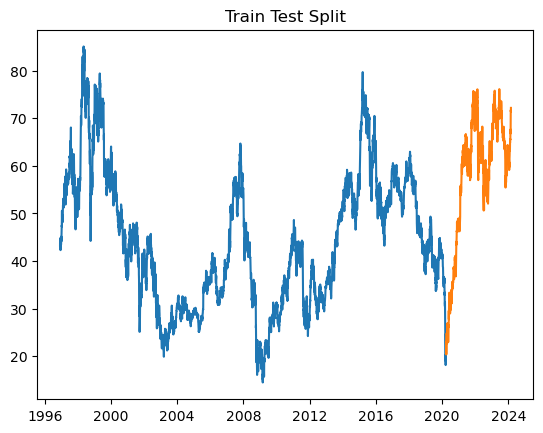

In [16]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [17]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [18]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [19]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 0.40
MAPE: 0.01
minae: 0.00
maxae: 3.08
medae: 0.31

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 0.42
MAPE: 0.01
minae: 0.00
maxae: 2.90
medae: 0.32

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 0.42
MAPE: 0.01
minae: 0.00
maxae: 2.53
medae: 0.32

Learning rate set to 0.353128
0:	learn: 9.4098110	total: 140ms	remaining: 13.8s
1:	learn: 6.3052876	total: 143ms	remaining: 7.02s
2:	learn: 4.3155562	total: 147ms	remaining: 4.75s
3:	learn: 3.0026220	total: 150ms	remaining: 3.6s
4:	learn: 2.1729710	total: 155ms	remaining: 2.94s
5:	learn: 1.6441103	total: 158ms	remaining: 2.48s
6:	learn: 1.3389496	total: 163ms	remaining: 2.16s
7:	learn: 1.1640172	total: 166ms	remaining: 1.91s
8:	learn: 1.0668348	total: 169ms	remaining: 1.71s
9:	learn: 1.0084720	total: 175ms	remaining: 1.58s
10:	learn: 0.9522455	total: 186ms	remaining: 

#### Retrain the best Model(Extreme Gradient Boosting)

In [20]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [21]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [22]:
#combined_1.plot();
combined_2

,close,0
date,,
2020-03-30,22.627689,22.339969
2020-03-31,22.889690,22.828954
2020-04-01,21.230354,21.512696
2020-04-02,20.939241,21.170406
2020-04-03,20.394447,20.691678
...,...,...
2024-02-21,68.070000,67.927008
2024-02-22,71.269997,71.237930
2024-02-23,71.680000,72.018441


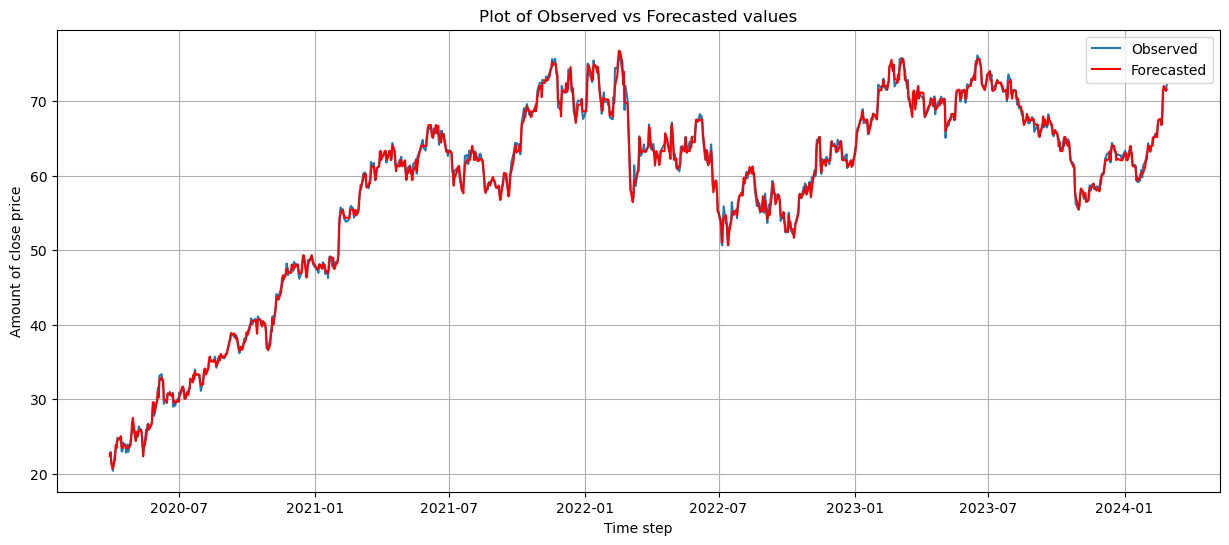

In [23]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [24]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [25]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [26]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [27]:
data['RSI']= computeRSI(data['close'], 14)

In [28]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
1996-12-02,42.739178,43.462132,42.654171,43.249538,1104301,44.780453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-03,43.844894,44.844238,43.802399,44.780453,2090177,44.312675,43.249538,1.017391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-04,44.397755,44.546562,43.908695,44.312675,1395255,43.611015,44.780453,0.994750,88.029991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-05,44.270164,44.716648,43.079445,43.611015,2248879,42.611588,44.312675,0.992020,89.093128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-06,42.547874,42.951847,41.676037,42.611588,3265414,43.504707,43.611015,0.988409,87.923690,0.974802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data.shape 

(6983, 19)

In [30]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
1996-12-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.249538,NaN
1996-12-03,1.017391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.780453,NaN
1996-12-04,0.994750,88.029991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.312675,NaN
1996-12-05,0.992020,89.093128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.611015,NaN
1996-12-06,0.988409,87.923690,0.974802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.611588,NaN


In [31]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [32]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [33]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [34]:
new_data=new_data.dropna()
new_data.shape 

(5983, 16)

In [35]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
2000-10-02,1.000590,83.881733,0.994102,213.309955,0.885713,2873.870454,0.791900,13379.822364,0.699455,60527.920016,42.335945,-0.091396,42.072559,42.535565,60.509746,46.355241
2000-10-03,1.000000,84.621986,0.996242,212.935668,0.887484,2867.923459,0.792681,13365.300052,0.699484,60527.006423,42.335945,-0.074377,42.319310,42.138406,60.491609,46.159177
2000-10-04,0.993176,84.671890,0.992842,212.478206,0.877332,2862.201035,0.782861,13352.141807,0.690031,60524.561915,41.762039,-0.077870,42.144643,42.179992,60.472935,45.944683
2000-10-05,1.004954,84.097984,0.999961,210.315662,0.887845,2856.071057,0.791572,13336.355239,0.696919,60522.011279,42.177914,-0.060926,42.091966,42.152961,60.454713,45.760938
2000-10-06,1.005881,83.939953,1.009920,210.897884,0.899765,2850.356954,0.801808,13320.934642,0.705164,60520.578178,42.676964,-0.028955,42.205639,42.238215,60.437024,45.610500


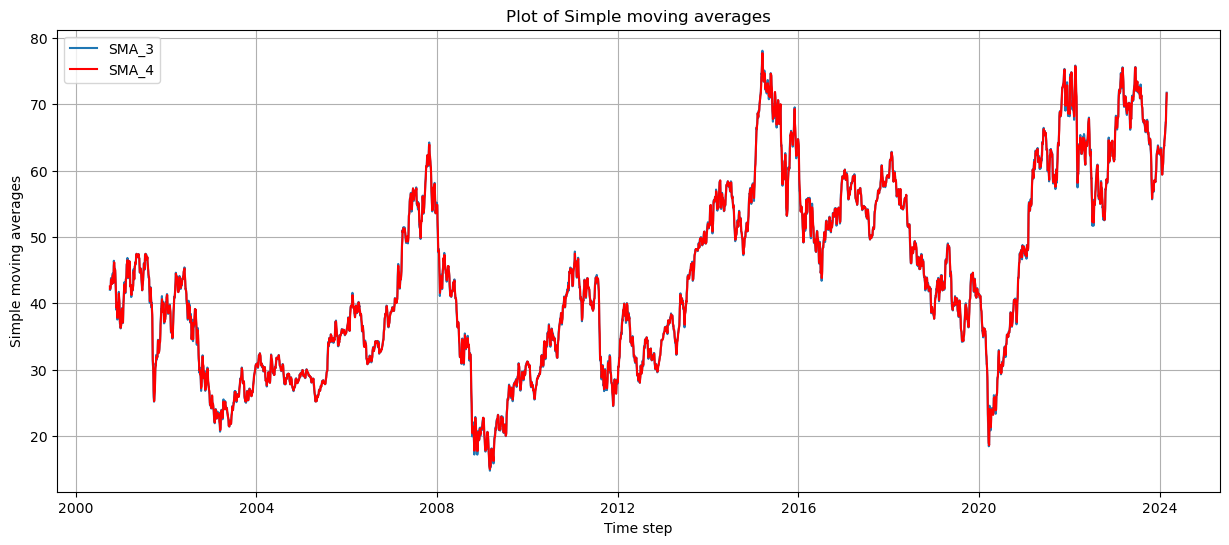

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

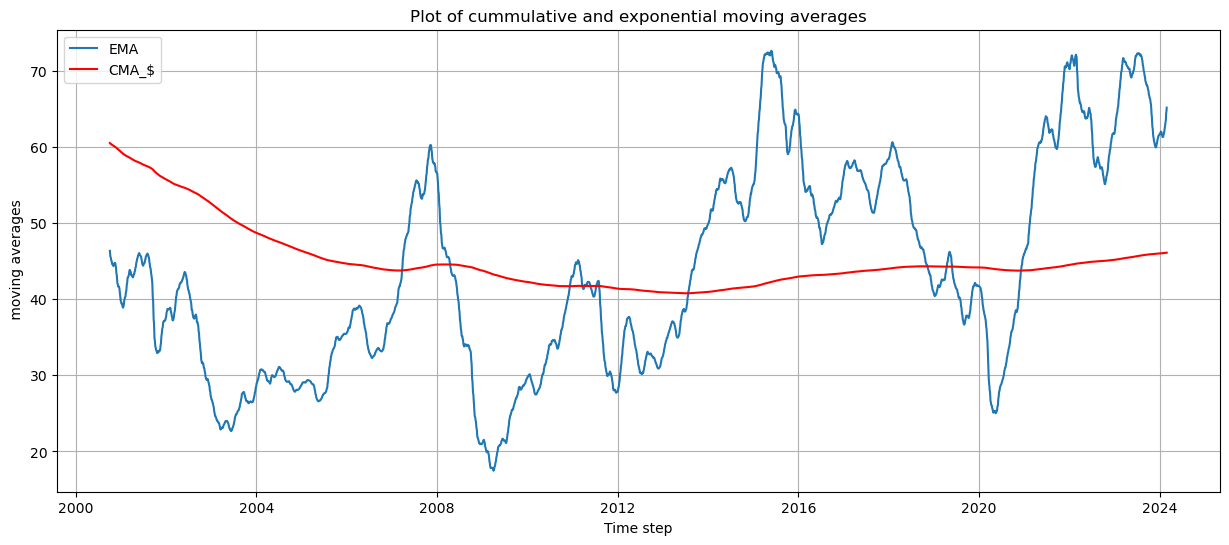

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

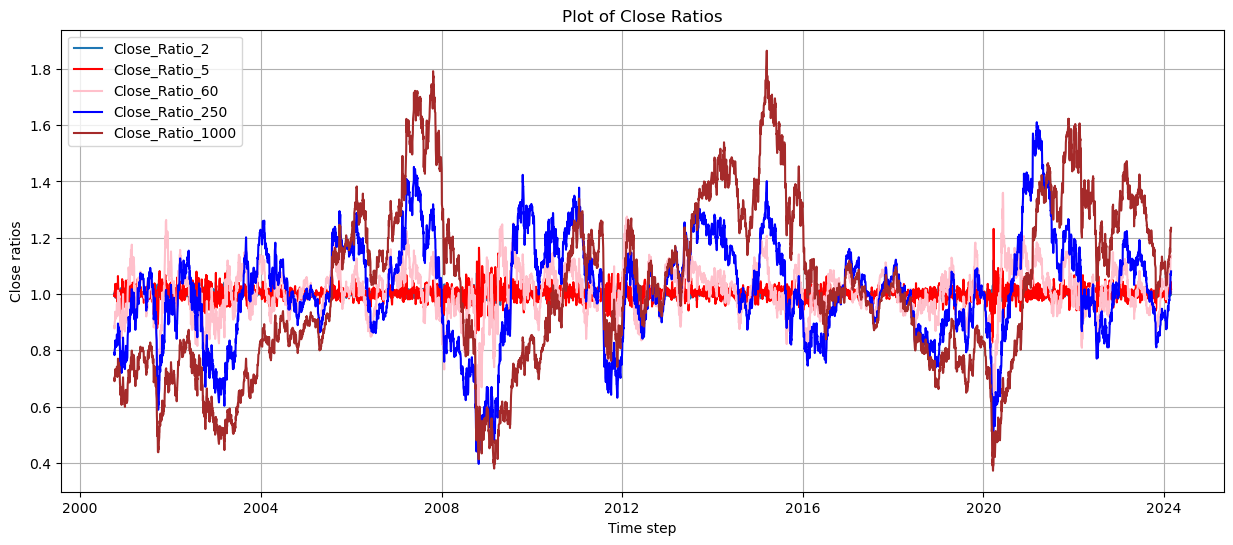

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

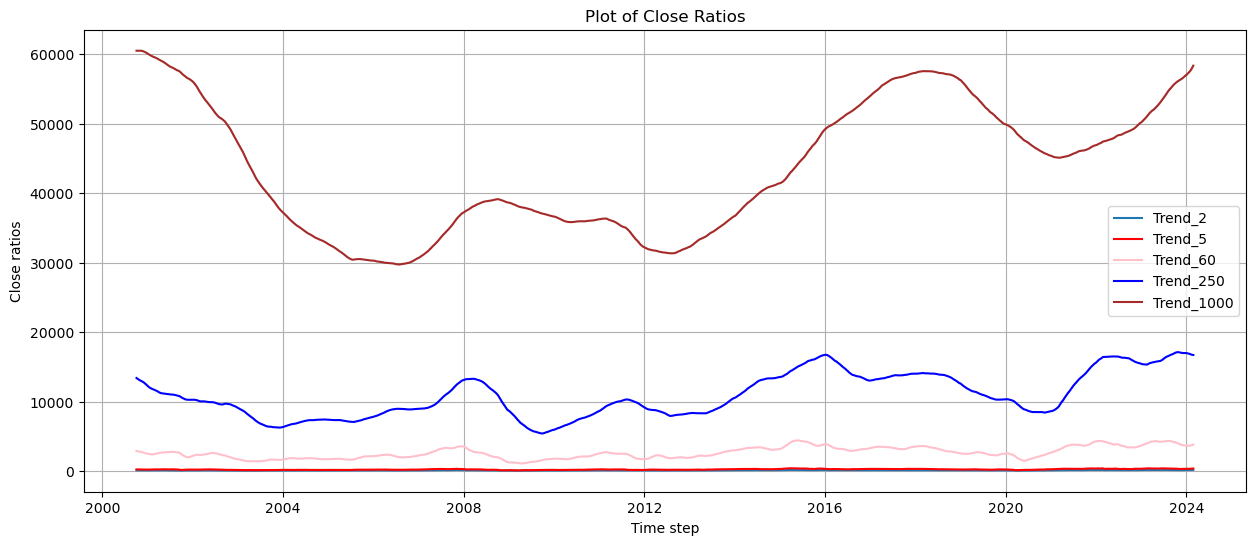

In [39]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [40]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

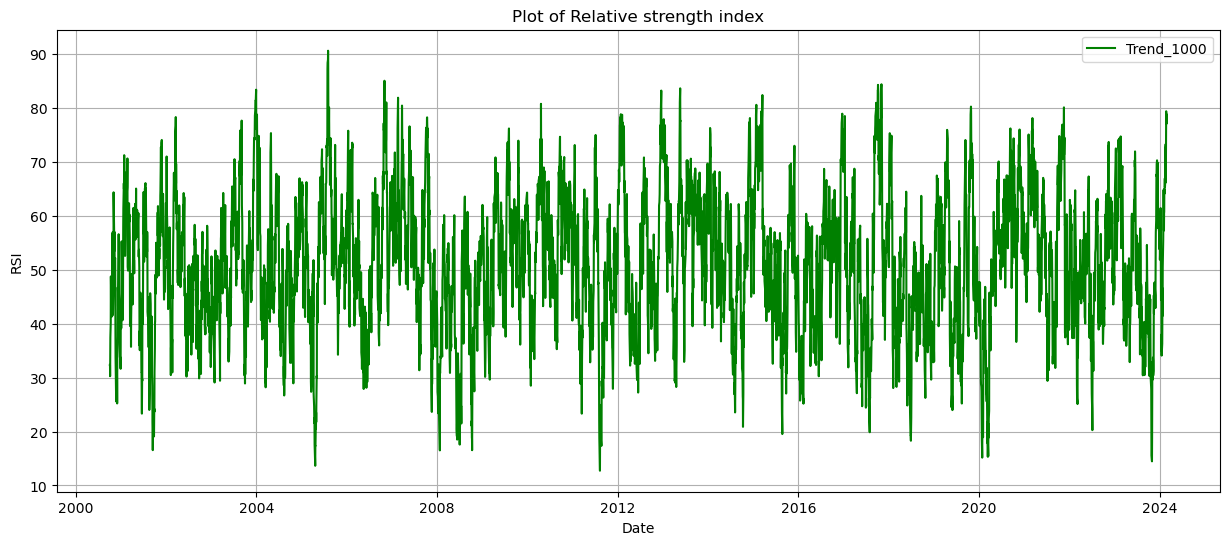

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

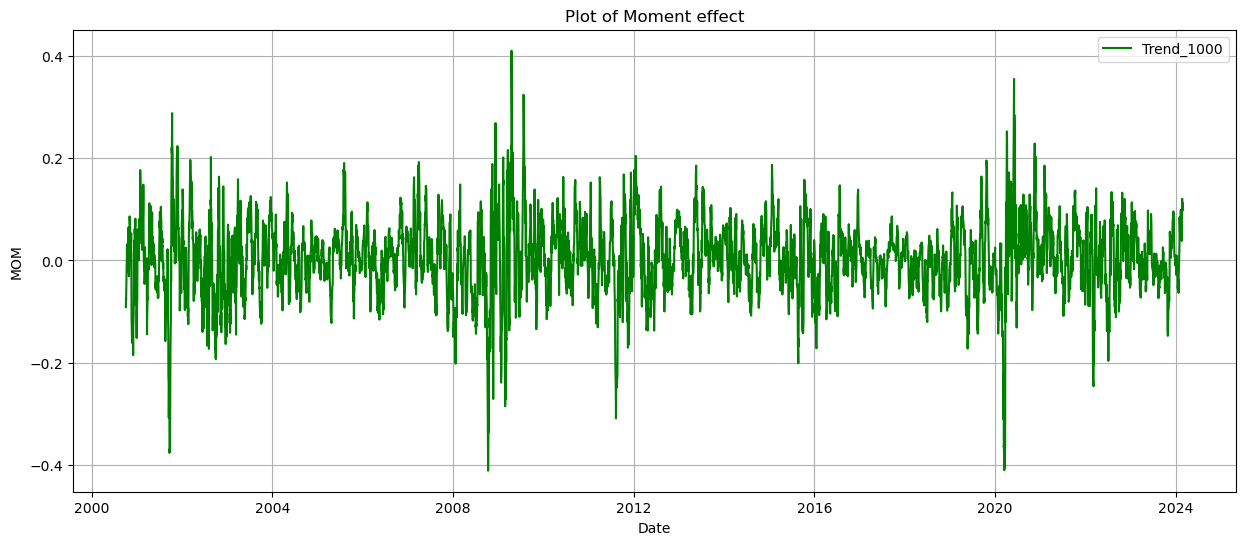

In [42]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [43]:
train = new_data.iloc[:-1000]
test = new_data.iloc[-1000:]

In [44]:
train.shape

(4983, 18)

In [45]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [46]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM', 'previousday'] 

#### Retrain the models on the new predictors

In [47]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 0.57
MAPE: 0.01
minae: 0.00
maxae: 3.59
medae: 0.44

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 0.58
MAPE: 0.01
minae: 0.00
maxae: 3.43
medae: 0.47

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 0.58
MAPE: 0.01
minae: 0.00
maxae: 3.46
medae: 0.46

Learning rate set to 0.34307
0:	learn: 8.3500445	total: 4.89ms	remaining: 484ms
1:	learn: 5.7266107	total: 9.71ms	remaining: 476ms
2:	learn: 4.0032283	total: 14.3ms	remaining: 461ms
3:	learn: 2.8914907	total: 19ms	remaining: 455ms
4:	learn: 2.1262411	total: 22.9ms	remaining: 436ms
5:	learn: 1.6297428	total: 27.9ms	remaining: 437ms
6:	learn: 1.3364258	total: 32.4ms	remaining: 430ms
7:	learn: 1.1386765	total: 37.3ms	remaining: 429ms
8:	learn: 1.0120993	total: 42.2ms	remaining: 427ms
9:	learn: 0.9399933	total: 46.8ms	remaining: 421ms
10:	learn: 0.9029376	total: 50.6ms	remaining: 410ms
11:	learn: 0.8701001	total:

#### Improving the model

In [48]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [49]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [50]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [51]:
predictions_2 = backtest(new_data, model_2, predictors)

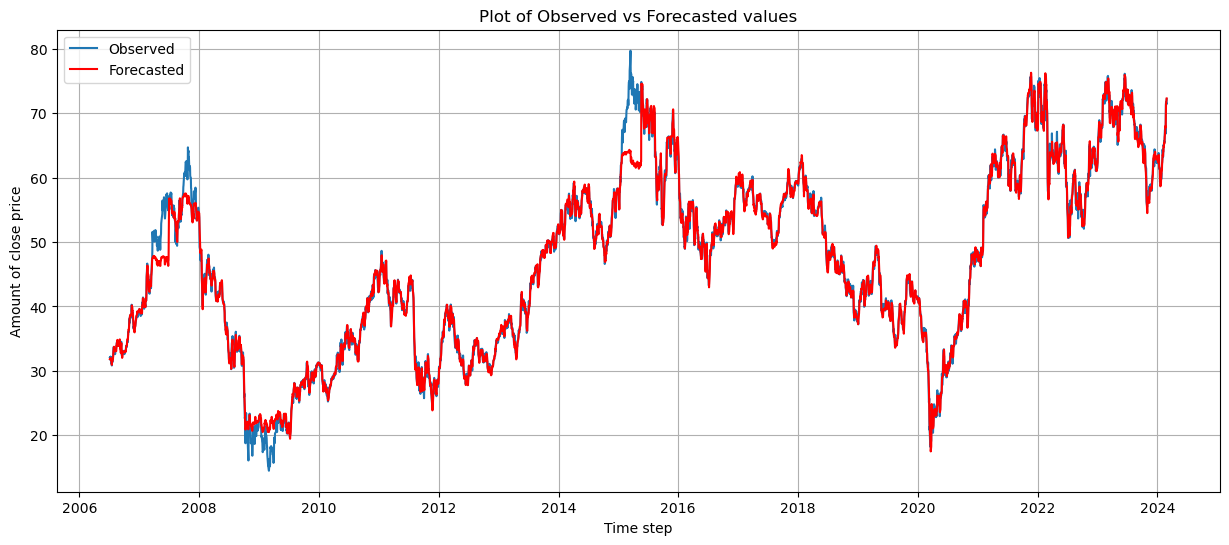

In [52]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [53]:
model_2.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [54]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [55]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.011854263953325733

mean absolute  error is : 0.6649166861399615



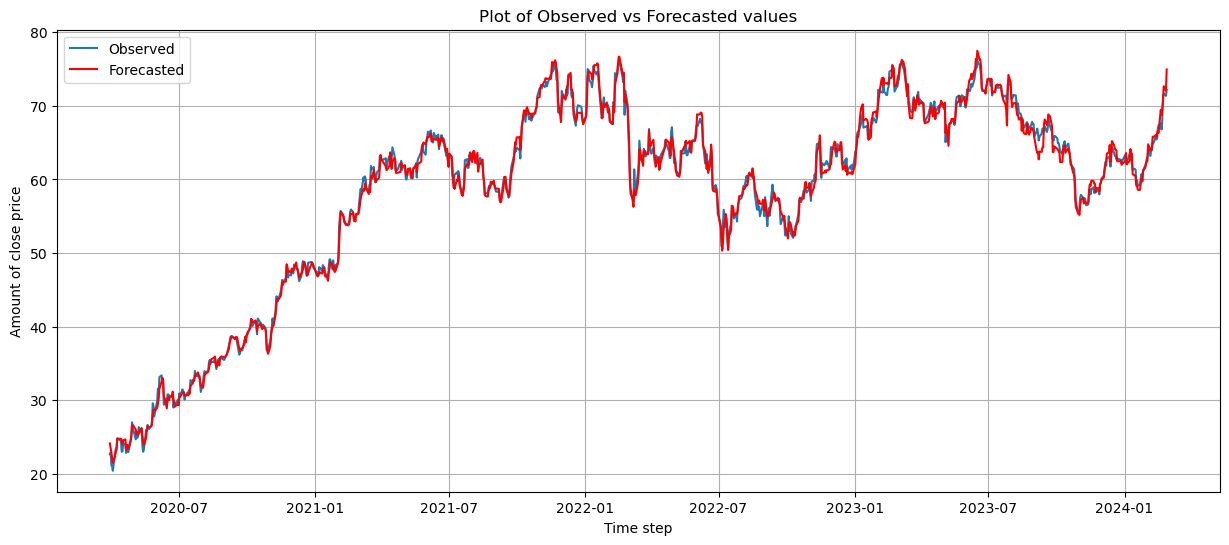

In [56]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [57]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [58]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [59]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 0.552250387874576 
 gradientboost minae: 0.0007215054114162456 
 gradientboost maxae: 3.1909715816584168 
 gradientboost medae: 0.43419847757686014 
 gradientboost Mape: 0.009875901331937036 
  

 <-------------------------------------------------->



In [60]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2020-03-30,22.627689,22.822916
2020-03-31,22.889690,22.746228
2020-04-01,21.230354,21.860839
2020-04-02,20.939241,21.449757
2020-04-03,20.394447,20.603828
...,...,...
2024-02-21,68.070000,68.365703
2024-02-22,71.269997,69.726032
2024-02-23,71.680000,71.670057


In [61]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [62]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.009875901331937036

mean absolute  error is : 0.552250387874576



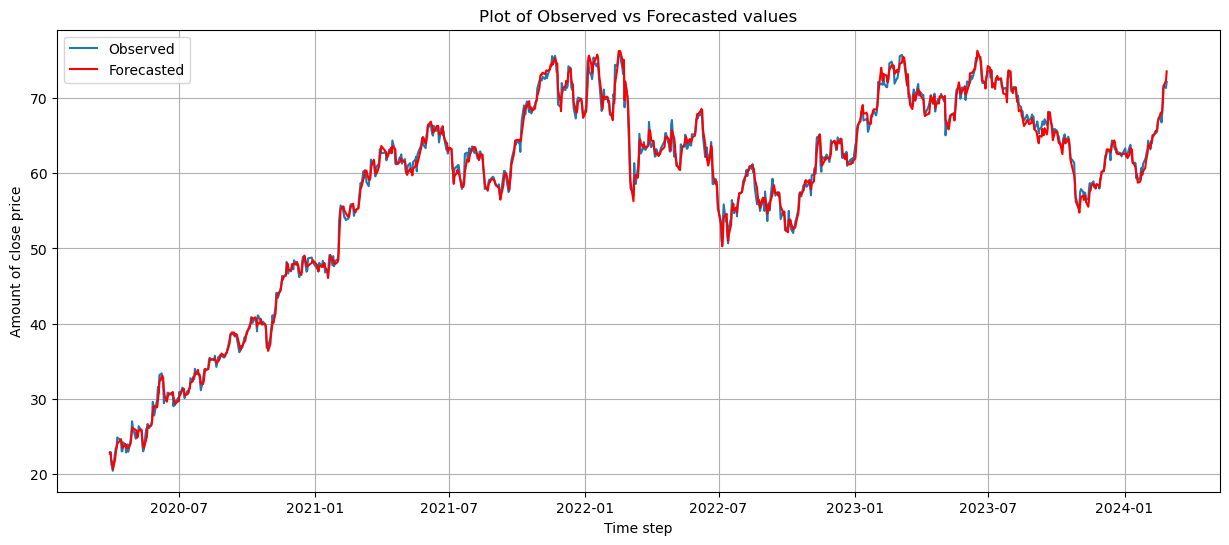

In [63]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [64]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 0.6030675859999998 
 bagging minae: 0.0015980000000013206 
 bagging maxae: 3.947646099999993 
 bagging medae: 0.47641064999999827 
 bagging Mape: 0.010761576845801016 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 0.43185884933309693 
 stacking minae: 0.0005021186245102172 
 stacking maxae: 2.6989806387335733 
 stacking medae: 0.33050277300040776 
 stacking mape: 0.007946835580681886 



In [65]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [66]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [67]:
combined_bagg.head()

,close,0
date,,
2020-03-30,22.627689,23.185376
2020-03-31,22.889690,22.959973
2020-04-01,21.230354,22.354045
2020-04-02,20.939241,21.244494
2020-04-03,20.394447,20.706769


In [68]:
combined_stack

,close,0
date,,
2020-03-30,22.627689,23.797620
2020-03-31,22.889690,22.865163
2020-04-01,21.230354,22.321175
2020-04-02,20.939241,22.139200
2020-04-03,20.394447,20.873085
...,...,...
2024-02-21,68.070000,68.022538
2024-02-22,71.269997,69.569133
2024-02-23,71.680000,70.801078


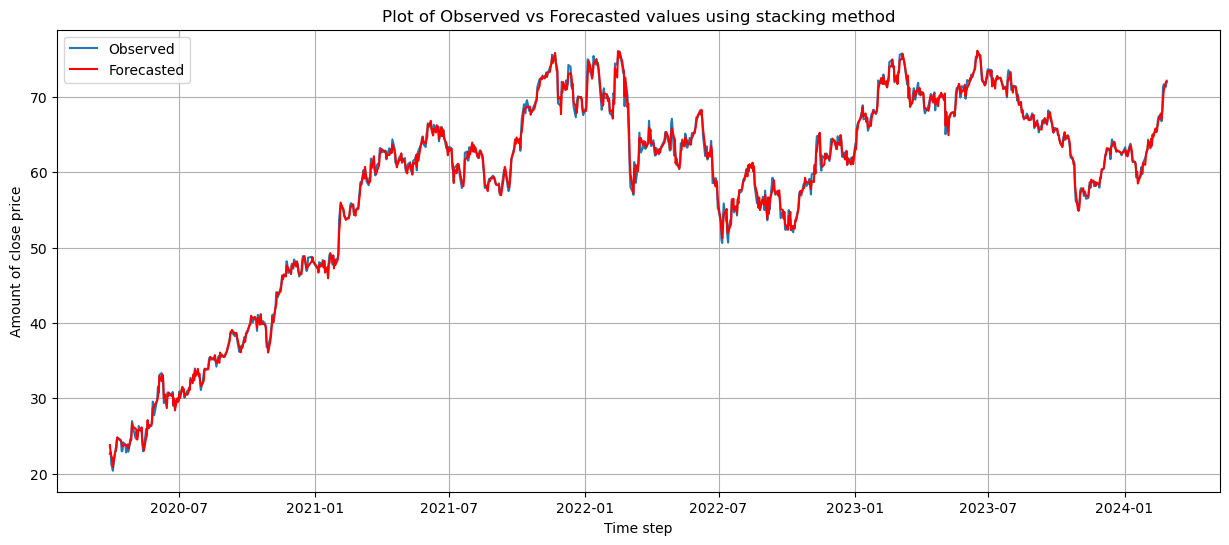

In [69]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

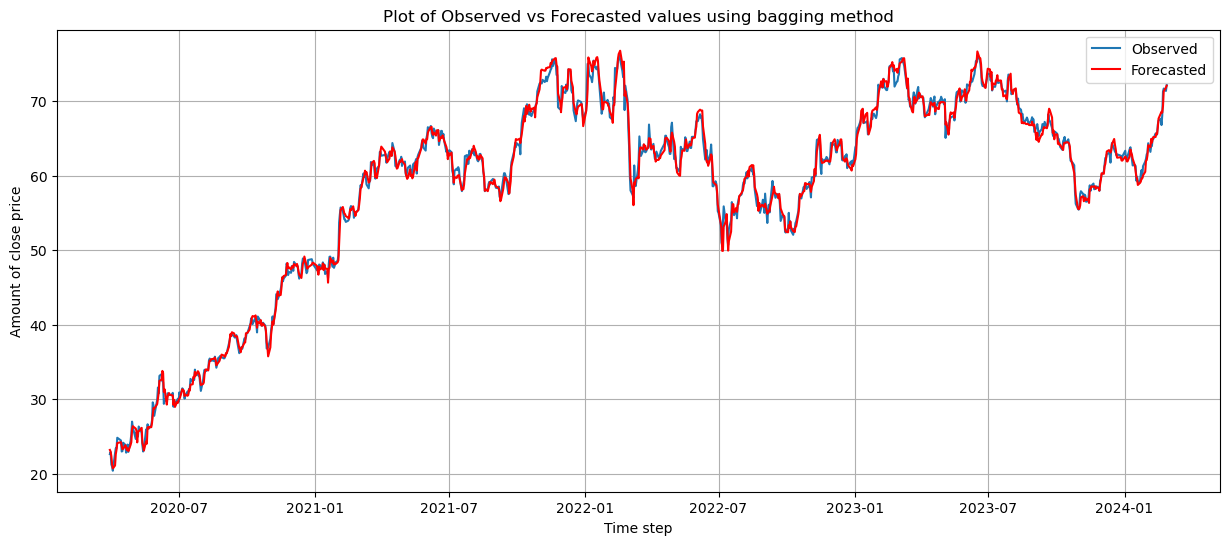

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

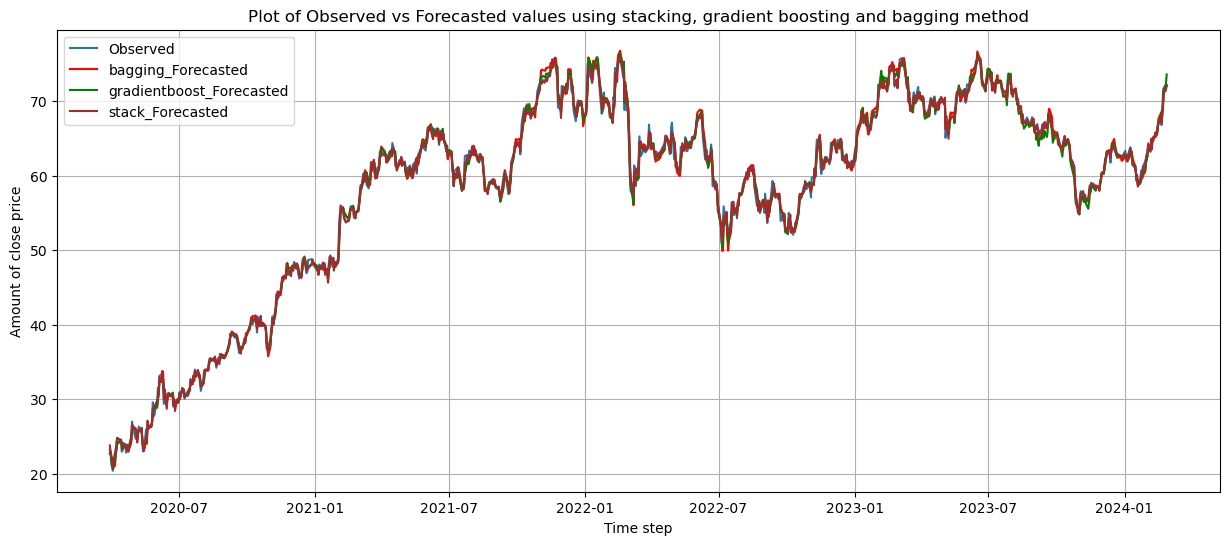

In [71]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('Mercedezresult.png')
plt.show()

In [72]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 0.57, 0.01, 0.00, 3.59, 0.44])
task1_result.add_row(['XGboost', 0.58, 0.01, 0.00, 3.43, 0.47])
task1_result.add_row(['GradientBoost', 0.58, 0.01, 0.00, 3.46, 0.46])
task1_result.add_row(['Catboost', 0.66, 0.01, 0.00, 3.30, 0.55])
task1_result.add_row(['Bagging', 0.60, 0.01, 0.00, 3.95, 0.48])
task1_result.add_row(['Stacking', 0.43, 0.01, 0.00, 2.79, 0.32])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |     0.57    |     0.01     |      0.0      |      3.59     |      0.44     |
|    XGboost    |     0.58    |     0.01     |      0.0      |      3.43     |      0.47     |
| GradientBoost |     0.58    |     0.01     |      0.0      |      3.46     |      0.46     |
|    Catboost   |     0.66    |     0.01     |      0.0      |      3.3      |      0.55     |
|    Bagging    |     0.6     |     0.01     |      0.0      |      3.95     |      0.48     |
|    Stacking   |     0.43    |     0.01     |      0.0      |      2.79     |      0.32     |
+---------------+-------------+--------------+---------------+---------------+---------------+
